#the link of data
https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets/data

# Import the libraries

In [10]:
#import the important libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings('ignore')
import zipfile
import matplotlib.pyplot as plt
import numpy as np


#Load the data from kaggel

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets

 77% 65.0M/84.3M [00:00<00:00, 117MB/s] 
100% 84.3M/84.3M [00:00<00:00, 116MB/s]


In [13]:
#extract the zip fill of data
zip_ref = zipfile.ZipFile('/content/covid19-xray-dataset-train-test-sets.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# creat the data to train and validation sets

In [14]:
train = keras.utils.image_dataset_from_directory(
    directory = '/content/xray_dataset_covid19/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation = keras.utils.image_dataset_from_directory(
    directory = '/content/xray_dataset_covid19/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 148 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [15]:
#show the class inside the sets
train_dir = ('/content/xray_dataset_covid19/train')
validation_dir = ('/content/xray_dataset_covid19/test')
classes_train =os.listdir(train_dir)
classes_val =os.listdir(validation_dir)
classes_train
classes_val

['PNEUMONIA', 'NORMAL']

# Data augmentation and preprocessing

In [16]:
train_datagen=ImageDataGenerator(
    #zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1/255, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1, #Shear angle in counter-clockwise direction in degrees
    fill_mode='nearest',
    rotation_range=20,
)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size= 16,
    target_size=(1000,1000,3)[:2]
)

val_datagen=ImageDataGenerator(rescale=1/255)
val_generator=val_datagen.flow_from_directory(
    validation_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=16,
    target_size=(1000,1000,3)[:2]
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


# CNN Model

In [17]:
# build the model
model=Sequential()

model.add(Conv2D(32,(2,2),activation='relu',input_shape=(1000,1000,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

#compile the model
model.compile(optimizer='adam' ,loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
#call backs
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)
callbacks = [earlystop, learning_rate_reduction]

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 999, 999, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 499, 499, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 498, 498, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 166, 166, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 164, 164, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 54, 54, 64)        0

In [20]:
#fit the model
history=model.fit(
    train_generator,
    epochs=14,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/14
10/10 [==============================] - ETA: 0s - loss: 2.5896 - accuracy: 0.5743 

10/10 [==============================] - 251s 23s/step - loss: 2.5896 - accuracy: 0.5743 - val_loss: 0.6833 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 2/14
10/10 [==============================] - ETA: 0s - loss: 0.6828 - accuracy: 0.5676 

10/10 [==============================] - 238s 23s/step - loss: 0.6828 - accuracy: 0.5676 - val_loss: 0.5315 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 3/14
10/10 [==============================] - ETA: 0s - loss: 0.4894 - accuracy: 0.8649 

10/10 [==============================] - 237s 23s/step - loss: 0.4894 - accuracy: 0.8649 - val_loss: 0.2006 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 4/14
10/10 [==============================] - ETA: 0s - loss: 0.3573 - accuracy: 0.8378 

10/10 [==============================] - 234s 22s/step - loss: 0.3573 - accuracy: 0.8378 - val_loss: 0.0738 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/14
10/10 [==============================] - ETA: 0s - loss: 0.4613 - accuracy: 0.8649 

10/10 [==============================] - 233s 22s/step - loss: 0.4613 - accuracy: 0.8649 - val_loss: 0.2343 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/14
10/10 [==============================] - ETA: 0s - loss: 0.3630 - accuracy: 0.8514 

10/10 [==============================] - 238s 23s/step - loss: 0.3630 - accuracy: 0.8514 - val_loss: 0.1379 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 7/14
10/10 [==============================] - ETA: 0s - loss: 0.2840 - accuracy: 0.8919 

10/10 [==============================] - 237s 23s/step - loss: 0.2840 - accuracy: 0.8919 - val_loss: 0.1178 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 8/14
10/10 [==============================] - ETA: 0s - loss: 0.2917 - accuracy: 0.9054 

10/10 [==============================] - 234s 25s/step - loss: 0.2917 - accuracy: 0.9054 - val_loss: 0.0413 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 9/14
10/10 [==============================] - ETA: 0s - loss: 0.2731 - accuracy: 0.8986 

10/10 [==============================] - 239s 23s/step - loss: 0.2731 - accuracy: 0.8986 - val_loss: 0.0626 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 10/14
10/10 [==============================] - ETA: 0s - loss: 0.3386 - accuracy: 0.8784 

10/10 [==============================] - 237s 23s/step - loss: 0.3386 - accuracy: 0.8784 - val_loss: 0.1845 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 11/14
10/10 [==============================] - ETA: 0s - loss: 0.2481 - accuracy: 0.8986 

10/10 [==============================] - 238s 23s/step - loss: 0.2481 - accuracy: 0.8986 - val_loss: 0.0531 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 12/14
10/10 [==============================] - ETA: 0s - loss: 0.2082 - accuracy: 0.9189 

10/10 [==============================] - 240s 26s/step - loss: 0.2082 - accuracy: 0.9189 - val_loss: 0.0794 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 13/14
10/10 [==============================] - ETA: 0s - loss: 0.1820 - accuracy: 0.9324 

10/10 [==============================] - 235s 22s/step - loss: 0.1820 - accuracy: 0.9324 - val_loss: 0.0832 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 14/14
10/10 [==============================] - ETA: 0s - loss: 0.2022 - accuracy: 0.9257 

10/10 [==============================] - 238s 23s/step - loss: 0.2022 - accuracy: 0.9257 - val_loss: 0.0846 - val_accuracy: 0.9750 - lr: 0.0010


# Model Accurcy

<Axes: >

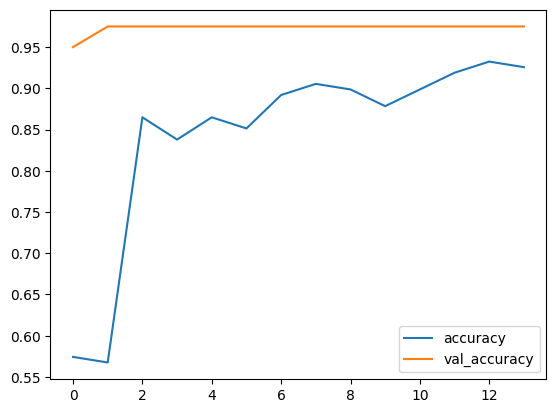

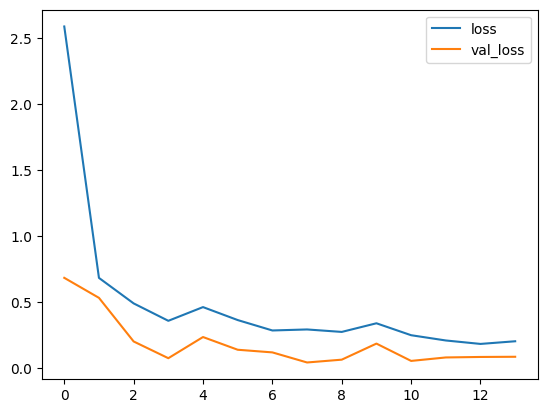

In [21]:
#plot the accurcy
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [22]:
# evaluate the model on test_set
model.evaluate(val_generator)

3/3 [==============================] - 16s 4s/step - loss: 0.0846 - accuracy: 0.9750


[0.08457012474536896, 0.9750000238418579]

# Predictions

In [23]:
model_pred=model.predict(val_generator)

3/3 [==============================] - 17s 5s/step


In [24]:
#define the classes name
class_names=['NORMAL','PNEUMONIA']

1/1 [==============================] - 6s 6s/step


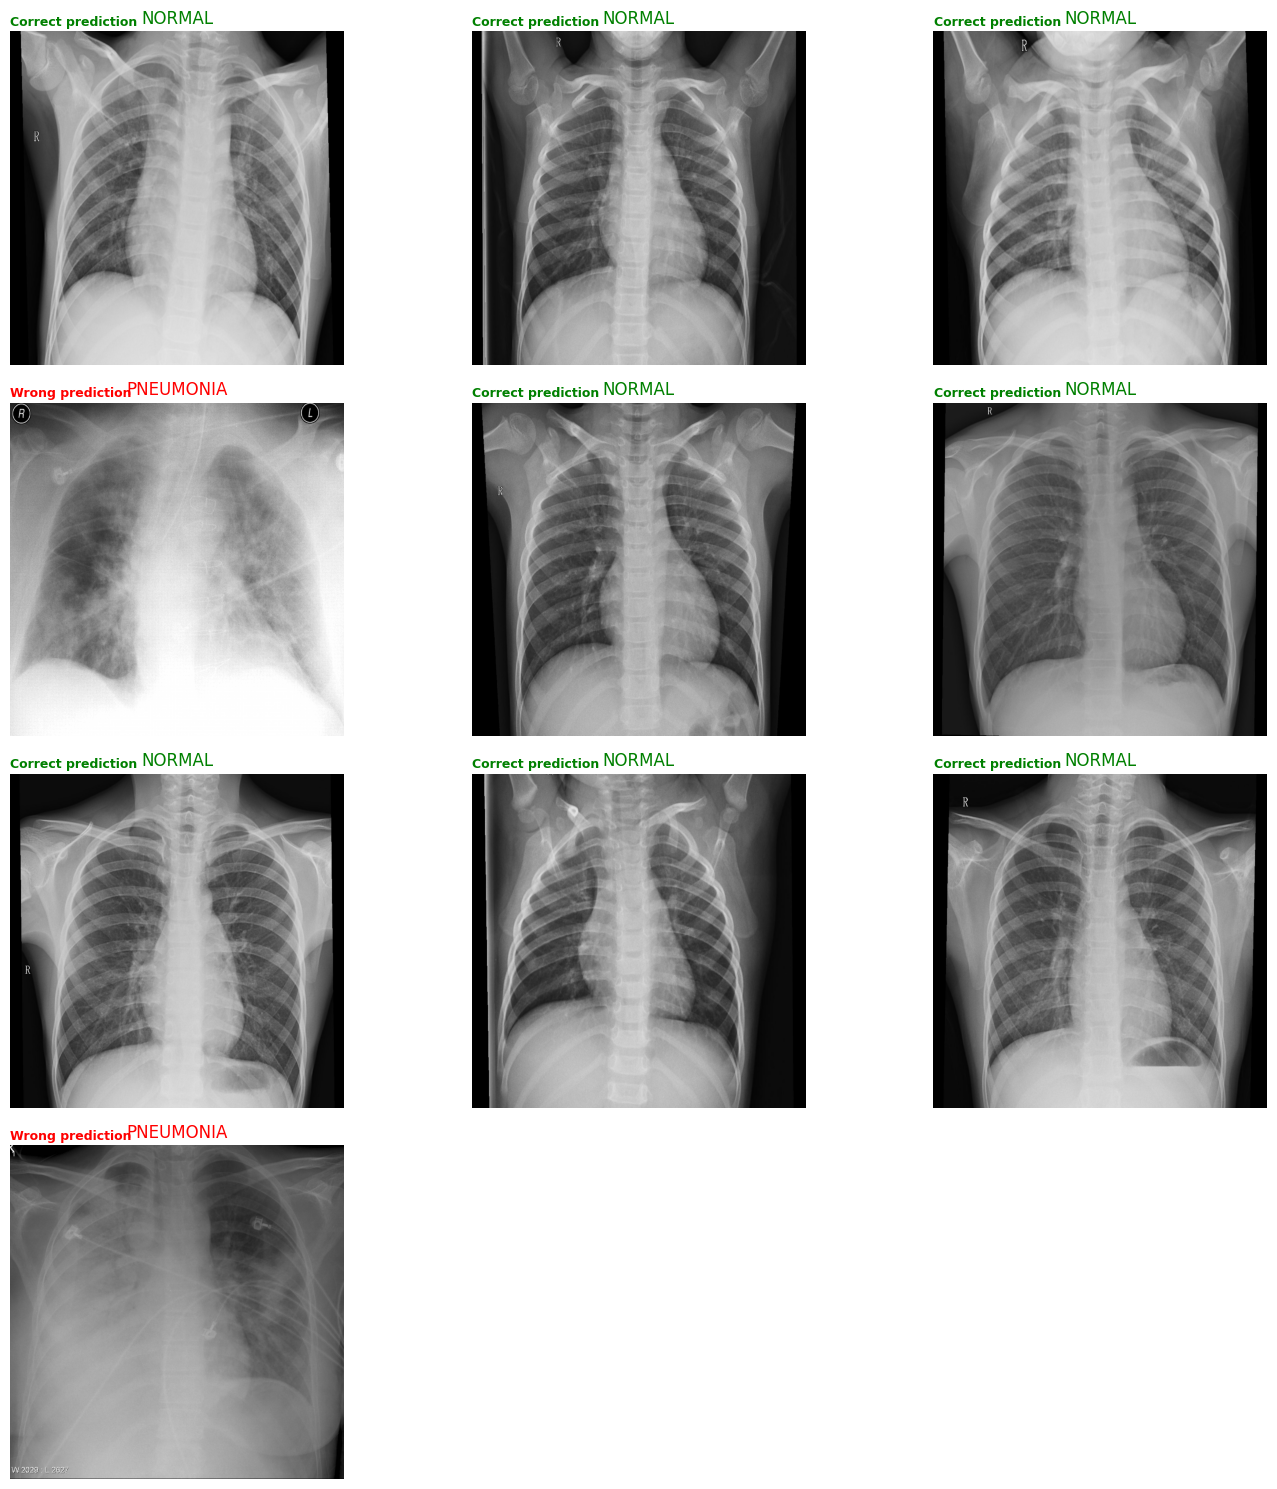

In [29]:
import matplotlib.pyplot as plt

def plot_prediction(val_generator, n_images):
    images, labels = val_generator.next()
    predictions = np.argmax(model.predict(images), axis=1)
    labels = labels.astype('int32')

    plt.figure(figsize=(14, 15))
    for i in range(n_images):
        plt.subplot(4, 3, i + 1)
        plt.imshow(images[i])
        if predictions[i] == labels[i]:
            plt.title(class_names[labels[i]], color='g')
            plt.text(0, -20, "Correct prediction ", color='g', fontsize=9, fontweight='bold')
        else:
            plt.title(class_names[labels[i]], color='r')
            plt.text(0, -20, "Wrong prediction", color='r', fontsize=9, fontweight='bold')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_prediction(val_generator,10)
